##  Exploratory Data Analysis (EDA)

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the dataset
train = pd.read_csv('titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test = pd.read_csv('titanic_test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
# Check for missing values
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_num = train[["Age", "SibSp", "Parch", "Fare"]]
train_cat = train[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]
     

In [14]:
train_num

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,NaN,1,2,23.4500
889,26.0,0,0,30.0000


In [15]:
train_cat

,Survived,Sex,Cabin,Embarked,Ticket
0,0,male,NaN,S,A/5 21171
1,1,female,C85,C,PC 17599
2,1,female,NaN,S,STON/O2. 3101282
3,1,female,C123,S,113803
4,0,male,NaN,S,373450
...,...,...,...,...,...
886,0,male,NaN,S,211536
887,1,female,B42,S,112053
888,0,female,NaN,S,W./C. 6607
889,1,male,C148,C,111369


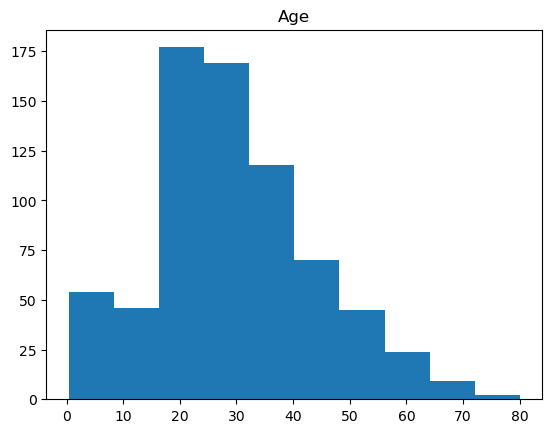

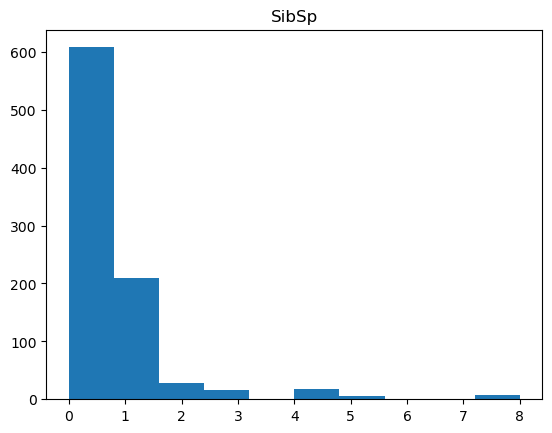

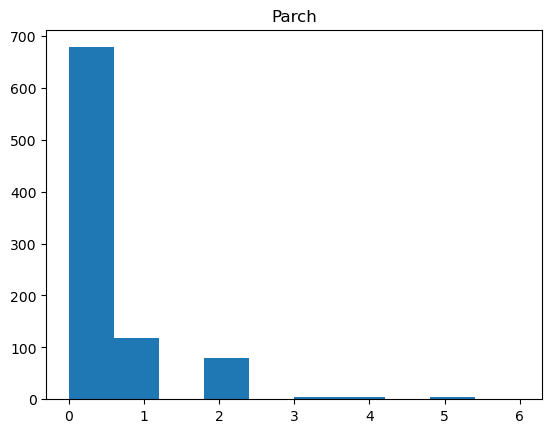

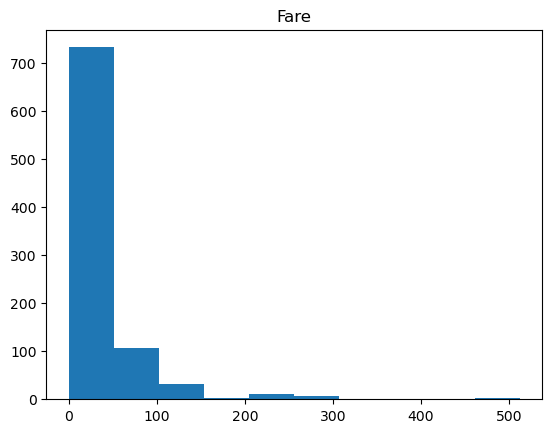

In [19]:
# Plot histograms for numerical columns
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

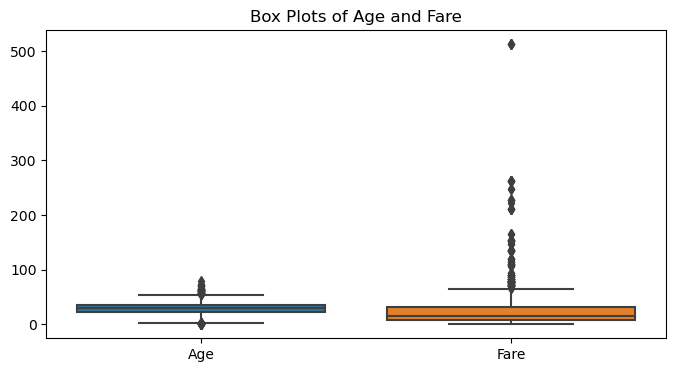

In [75]:
# Boxplots for numerical columns
plt.figure(figsize=(8,4))
sns.boxplot(data=train[['Age', 'Fare']])
plt.title("Box Plots of Age and Fare")
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

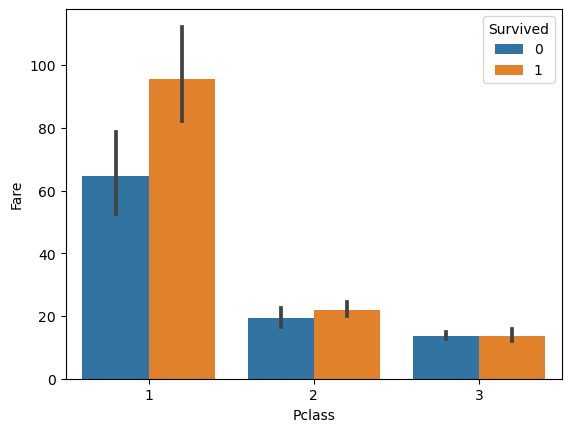

In [22]:
# Bar plot for categorical features
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

In [76]:
##This pd.pivot_table() groups data by Survived and calculates the mean of Age, SibSp, Parch, and Fare for survivors and non-survivors, helping identify patterns related to survival.
pd.pivot_table(train, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.415100,22.117887,0.329690,0.553734
1,28.549778,48.395408,0.464912,0.473684


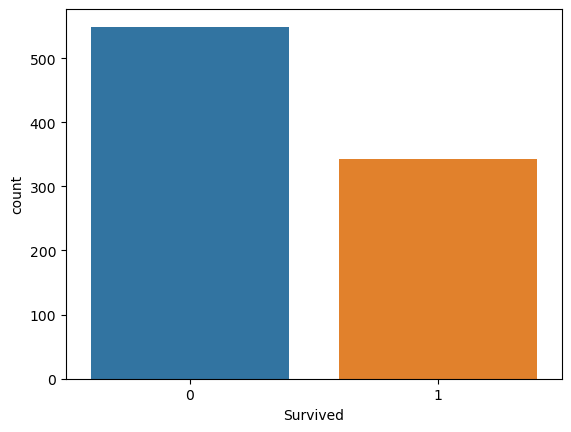

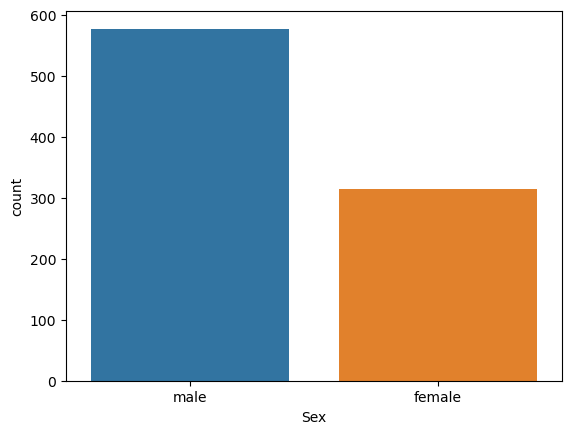

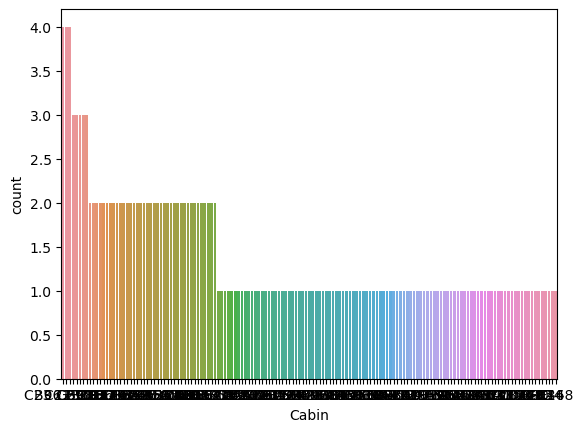

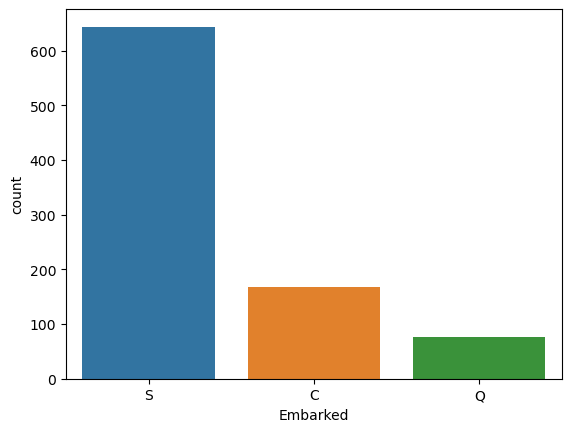

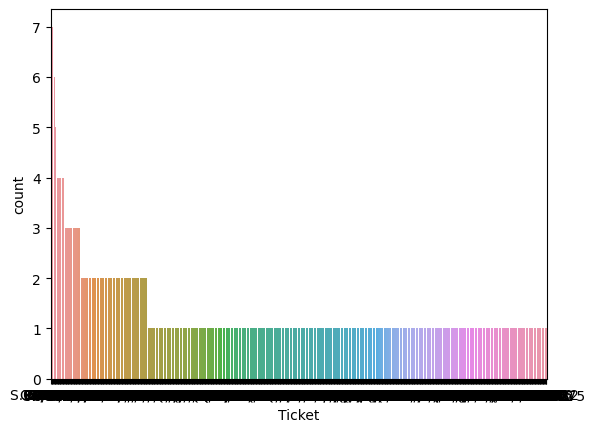

In [26]:
# Bar plot for categorical columns
for i in train_cat.columns:
    sns.barplot(x=train_cat[i].value_counts().index, y=train_cat[i].value_counts())
    plt.show()

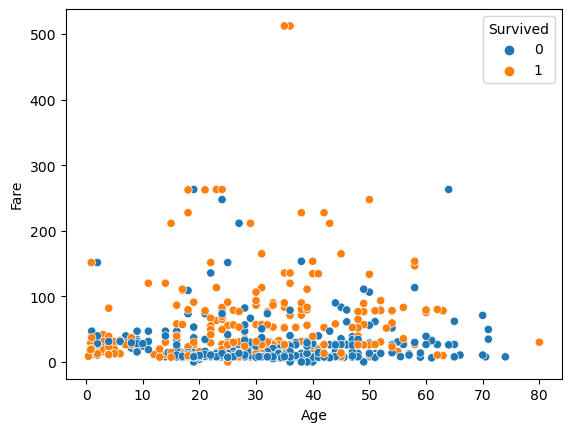

In [27]:
# Scatter plot to visualize relationships
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train)
plt.show()

<Axes: >

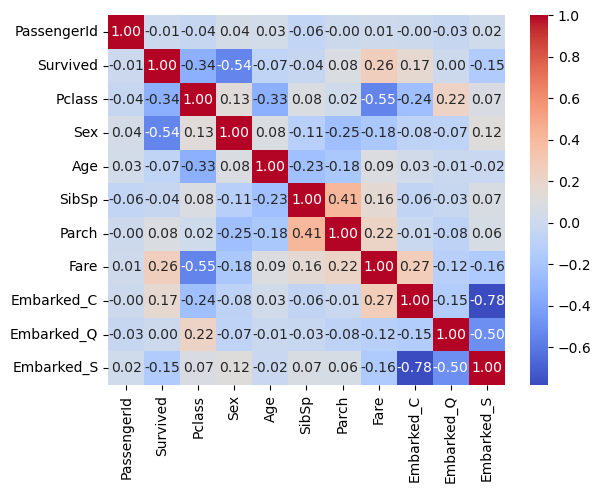

In [63]:
# Plot a heatmap
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

## Data Preprocessing
Impute missing values and encode categorical features.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [29]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
train['Age'] = imputer.fit_transform(train[['Age']])
train['Fare'] = imputer.fit_transform(train[['Fare']])

In [30]:
imputer

SimpleImputer()

In [32]:
# Encode categorical variables (using Label Encoding or One-Hot Encoding)
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train = pd.get_dummies(train, columns=['Embarked'])

In [33]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,True,False,False


In [34]:
# Separate features and target
X = train.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = train['Survived']

In [35]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,False,False,True
1,1,0,38.000000,1,0,71.2833,True,False,False
2,3,0,26.000000,0,0,7.9250,False,False,True
3,1,0,35.000000,1,0,53.1000,False,False,True
4,3,1,35.000000,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,False,False,True
887,1,0,19.000000,0,0,30.0000,False,False,True
888,3,0,29.699118,1,2,23.4500,False,False,True
889,1,1,26.000000,0,0,30.0000,True,False,False


In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
331,1,1,45.500000,0,0,28.5000,False,False,True
733,2,1,23.000000,0,0,13.0000,False,False,True
382,3,1,32.000000,0,0,7.9250,False,False,True
704,3,1,26.000000,1,0,7.8542,False,False,True
813,3,0,6.000000,4,2,31.2750,False,False,True
...,...,...,...,...,...,...,...,...,...
106,3,0,21.000000,0,0,7.6500,False,False,True
270,1,1,29.699118,0,0,31.0000,False,False,True
860,3,1,41.000000,2,0,14.1083,False,False,True
435,1,0,14.000000,1,2,120.0000,False,False,True


In [82]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
709,3,1,29.699118,1,1,15.2458,True,False,False
439,2,1,31.000000,0,0,10.5000,False,False,True
840,3,1,20.000000,0,0,7.9250,False,False,True
720,2,0,6.000000,0,1,33.0000,False,False,True
39,3,0,14.000000,1,0,11.2417,True,False,False
...,...,...,...,...,...,...,...,...,...
433,3,1,17.000000,0,0,7.1250,False,False,True
773,3,1,29.699118,0,0,7.2250,True,False,False
25,3,0,38.000000,1,5,31.3875,False,False,True
84,2,0,17.000000,0,0,10.5000,False,False,True


In [83]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [84]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

##  Building Predictive Models
## LightGBM

In [38]:
import lightgbm as lgb

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
# Train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMClassifier()

In [41]:
# Predictions
y_pred_lgb = lgb_model.predict(X_test)

In [42]:
y_pred_lgb

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [79]:
# Evaluation
print('LightGBM Accuracy: %.2f' % accuracy_score(y_test, y_pred_lgb))
print('LightGBM Precision: %.2f' % precision_score(y_test, y_pred_lgb))
print('LightGBM Recall: %.2f' % recall_score(y_test, y_pred_lgb))
print('LightGBM F1 Score: %.2f' % f1_score(y_test, y_pred_lgb))

LightGBM Accuracy: 0.83
LightGBM Precision: 0.78
LightGBM Recall: 0.81
LightGBM F1 Score: 0.79


## XGBoost

In [44]:
import xgboost as xgb

In [45]:
# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [46]:

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

In [80]:
# Evaluation
print('XGBoost Accuracy: %.2f' % accuracy_score(y_test, y_pred_xgb))
print('Precision: %.2f' % precision_score(y_test, y_pred_xgb))
print('Recall: %.2f' % recall_score(y_test, y_pred_xgb))
print('F1 Score: %.2f' % f1_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.80
Precision: 0.75
Recall: 0.77
F1 Score: 0.76


##  Hyperparameter Tuning 
You can use GridSearchCV for hyperparameter tuning:

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# Define parameter grid for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200]
}

In [50]:
lgb_param_grid

{'num_leaves': [31, 50],
 'learning_rate': [0.01, 0.05],
 'n_estimators': [100, 200]}

In [51]:
# Grid Search
lgb_grid = GridSearchCV(lgb.LGBMClassifier(), lgb_param_grid, cv=3)
lgb_grid.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50]})

In [52]:
# Best parameters and score
print('Best params for LightGBM:', lgb_grid.best_params_)
print('Best score for LightGBM:', lgb_grid.best_score_)

Best params for LightGBM: {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 31}
Best score for LightGBM: 0.8146060111808436


In [53]:
# Define parameter grid for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

In [55]:
xgb_param_grid

{'max_depth': [3, 5], 'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]}

In [56]:
# Grid Search
xgb_grid = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=3)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]})

In [57]:
# Best parameters and score
print('Best params for XGBoost:', xgb_grid.best_params_)
print('Best score for XGBoost:', xgb_grid.best_score_)

Best params for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best score for XGBoost: 0.8258518597312343


##  Comparative Analysis
Finally, summarize and compare the models based on their performance metrics.

In [58]:
# Plotting comparison
models = ['LightGBM', 'XGBoost']
accuracy = [accuracy_score(y_test, y_pred_lgb), accuracy_score(y_test, y_pred_xgb)]
precision = [precision_score(y_test, y_pred_lgb), precision_score(y_test, y_pred_xgb)]
recall = [recall_score(y_test, y_pred_lgb), recall_score(y_test, y_pred_xgb)]
f1 = [f1_score(y_test, y_pred_lgb), f1_score(y_test, y_pred_xgb)]

In [60]:
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

      Model  Accuracy  Precision    Recall  F1 Score
0  LightGBM  0.826816   0.779221  0.810811  0.794702
1   XGBoost  0.798883   0.750000  0.770270  0.760000


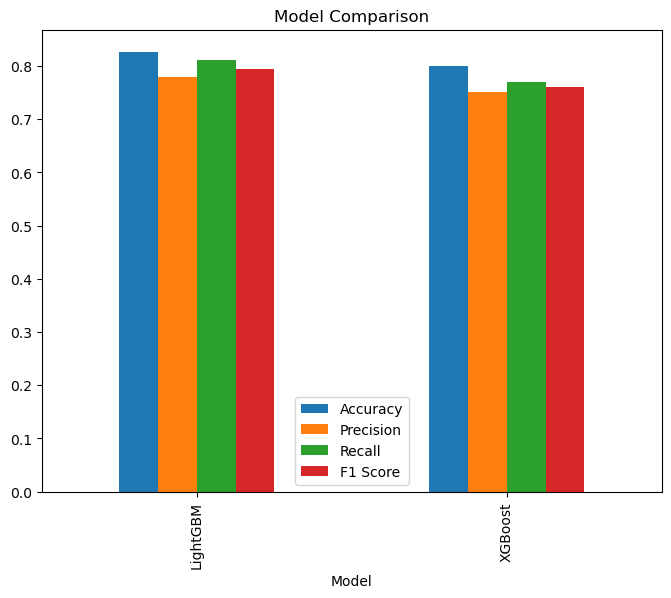

In [61]:
print(df)
df.plot(kind='bar', x='Model', figsize=(8, 6), title='Model Comparison')
plt.show()